In [1]:
!pip install kaggle

In [3]:
import zipfile

try:
    with zipfile.ZipFile('data.zip', 'r') as zip_ref:
        zip_ref.extractall('output_directory')
except zipfile.BadZipFile:
    print("The file is not a valid ZIP file.")

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [5]:
with_mask_files=os.listdir('/content/output_directory/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3289.jpg', 'with_mask_3029.jpg', 'with_mask_1270.jpg', 'with_mask_684.jpg', 'with_mask_957.jpg']
['with_mask_1012.jpg', 'with_mask_680.jpg', 'with_mask_1899.jpg', 'with_mask_344.jpg', 'with_mask_1806.jpg']


In [7]:
without_mask_files=os.listdir('/content/output_directory/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3675.jpg', 'without_mask_3292.jpg', 'without_mask_1874.jpg', 'without_mask_1476.jpg', 'without_mask_3454.jpg']
['without_mask_1347.jpg', 'without_mask_2051.jpg', 'without_mask_3757.jpg', 'without_mask_2078.jpg', 'without_mask_589.jpg']


In [11]:
print('The number of with mask images :',len(with_mask_files))
print('The number of without mask images :',len(without_mask_files))

The number of with mask images : 3725
The number of without mask images : 3828


In [12]:
#create labels
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [13]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [15]:
labels=with_mask_labels+without_mask_labels

In [16]:
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


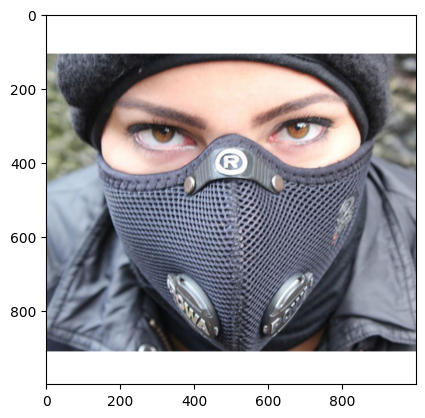

In [17]:
#display with mask image
img=mpimg.imread('/content/output_directory/data/with_mask/with_mask_3289.jpg')
imgplot=plt.imshow(img)
plt.show()

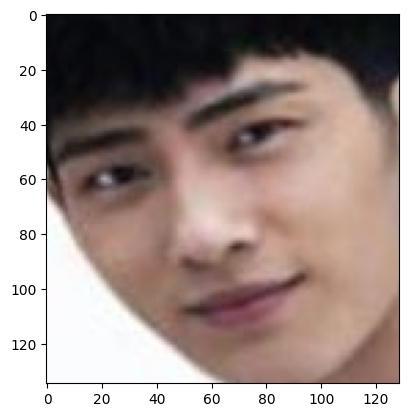

In [21]:
#display without mask image
img=mpimg.imread('/content/output_directory/data/without_mask/without_mask_1347.jpg')
imgplot=plt.imshow(img)
plt.show()

In [57]:
# convert images to numpy arrays

with_mask_path = '/content/output_directory/data/with_mask'
image_files = [f for f in os.listdir(with_mask_path) if f.endswith('.jpg') or f.endswith('.png')]
data = []
for img_file in with_mask_files:
  image= os.path.join(with_mask_path, img_file)
  image = Image.open(image)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/output_directory/data/without_mask'
image_files = [f for f in os.listdir(without_mask_path) if f.endswith('.jpg') or f.endswith('.png')]
for img_file in without_mask_files:
  image= os.path.join(without_mask_path, img_file)
  image = Image.open(image)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [58]:
type(data)

list

In [59]:
len(data)


7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
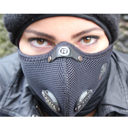

In [60]:
data[0]

In [61]:
type(data[0])

numpy.ndarray

In [62]:
data[0].shape

(128, 128, 3)

In [63]:
X=np.array(data)
y=np.array(labels)

In [64]:
type(X)

numpy.ndarray

In [65]:
type(y)

numpy.ndarray

In [66]:
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [69]:
print(X_train.shape,X_test.shape,X.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3) (7553, 128, 128, 3)


In [70]:
X_train=X_train/255
X_test=X_test/255

In [71]:
X_train[0]

array([[[0.85490196, 0.85882353, 0.83921569],
        [0.85490196, 0.85882353, 0.83921569],
        [0.85490196, 0.85882353, 0.83921569],
        ...,
        [0.81568627, 0.82352941, 0.81176471],
        [0.81568627, 0.82352941, 0.81176471],
        [0.81568627, 0.82352941, 0.81176471]],

       [[0.85490196, 0.85882353, 0.83921569],
        [0.85490196, 0.85882353, 0.83921569],
        [0.85490196, 0.85882353, 0.83921569],
        ...,
        [0.81568627, 0.82352941, 0.81176471],
        [0.81568627, 0.82352941, 0.81176471],
        [0.81568627, 0.82352941, 0.81176471]],

       [[0.85098039, 0.85490196, 0.83529412],
        [0.85098039, 0.85490196, 0.83529412],
        [0.85098039, 0.85490196, 0.83529412],
        ...,
        [0.81568627, 0.82352941, 0.81176471],
        [0.81568627, 0.82352941, 0.81176471],
        [0.81568627, 0.82352941, 0.81176471]],

       ...,

       [[0.85098039, 0.8745098 , 0.82352941],
        [0.85098039, 0.84313725, 0.77254902],
        [0.87058824, 0

In [72]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten,Dense,Conv2D,MaxPool2D

In [74]:
models=Sequential([
    Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)),
    MaxPool2D(pool_size=(2, 2), strides=2,padding='same'),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(2,activation='sigmoid')
])

In [75]:
models.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [76]:
history=models.fit(X_train,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.7837 - loss: 1.2130 - val_accuracy: 0.8926 - val_loss: 0.2556
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 178s 960ms/step - accuracy: 0.9234 - loss: 0.2040 - val_accuracy: 0.8959 - val_loss: 0.2610
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 168s 989ms/step - accuracy: 0.9566 - loss: 0.1281 - val_accuracy: 0.9041 - val_loss: 0.2764
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 195s 953ms/step - accuracy: 0.9667 - loss: 0.0910 - val_accuracy: 0.9058 - val_loss: 0.2775
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 202s 952ms/step - accuracy: 0.9781 - loss: 0.0726 - val_accuracy: 0.9157 - val_loss: 0.3446


In [77]:
y_pred=models.predict(X_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 252ms/step


In [78]:
loss,accuracy=models.evaluate(X_test,y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 282ms/step - accuracy: 0.9037 - loss: 0.3230


In [79]:
print(accuracy)

0.911316990852356


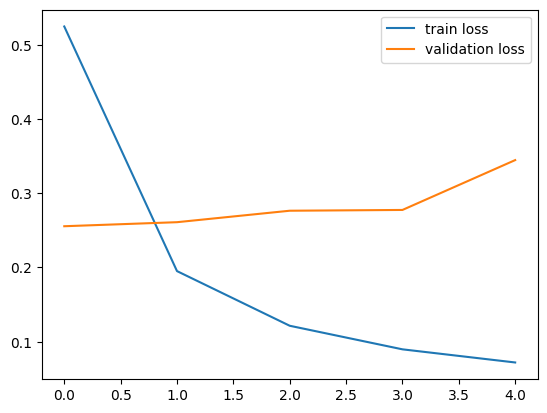

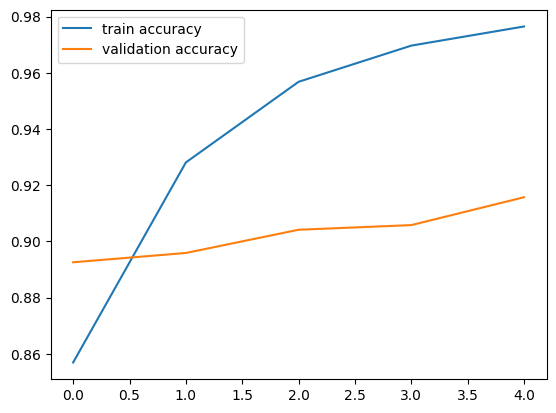

In [80]:
# plot the loss value
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Prediction

Path of the image to be predicted: /content/download.jpeg


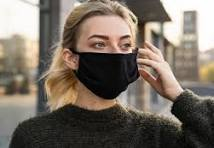

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[0.18755734 0.4848546 ]]
1
The person in the image is wearing a mask


In [82]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = models.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/images.jpeg


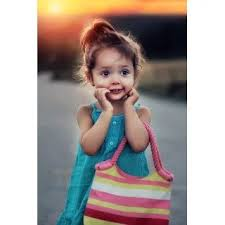

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.75180584 0.08425877]]
0
The person in the image is not wearing a mask


In [85]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = models.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')